In [40]:
import pandas as pd
import numpy as np

In [41]:
import glob

### Read data

In [88]:
paths = glob.glob("data/*/*") # Todos los csvs de todos los partidos

In [89]:
dfs = [] # lista de dataframes vacíos
for path in paths:
    df = pd.read_csv(path)
    dfs.append(df) # Metemos todos los dataframes en una lista

In [90]:
result = pd.concat(dfs) # Los concatenamos

In [91]:
result.head(3)

,Round,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Stage,Group
0,Prelim. Round | Leg 1,(Thu) 21 Aug 1969 (W33),TPS Turku › FIN (1),0-1,0-0,KB Kobenhavn › DEN (1),NaN,NaN,NaN,NaN,NaN,NaN
1,Prelim. Round | Leg 2,(Thu) 28 Aug 1969 (W34),KB Kobenhavn › DEN (2),4-0,0-0,TPS Turku › FIN (2),5-0 (agg.),NaN,NaN,NaN,NaN,NaN
2,Round 1 | Leg 1,(Wed) 10 Sep 1969 (W36),AC Milan › ITA (1),5-0,1-0,Avenir Beggen › LUX (1),NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
result['Team 1'] = result['Team 1'].apply(lambda x: x.split(" ›")[0]) #Parseamos los nombres que son raros

In [93]:
# Con cada team, aplico una función lambda, que me lo divide por el caracter raro, y se queda lo que esté
# antes de él

In [94]:
result['Team 2'] = result['Team 2'].apply(lambda x: x.split(" ›")[0])

In [95]:
result.head(3)

,Round,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Stage,Group
0,Prelim. Round | Leg 1,(Thu) 21 Aug 1969 (W33),TPS Turku,0-1,0-0,KB Kobenhavn,NaN,NaN,NaN,NaN,NaN,NaN
1,Prelim. Round | Leg 2,(Thu) 28 Aug 1969 (W34),KB Kobenhavn,4-0,0-0,TPS Turku,5-0 (agg.),NaN,NaN,NaN,NaN,NaN
2,Round 1 | Leg 1,(Wed) 10 Sep 1969 (W36),AC Milan,5-0,1-0,Avenir Beggen,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
def only_numeric_and_score(x):
    """
    Limpiar la basura de los resultados, a veces vienen cosas raras.
    Solo dejar guiones y números
    """
    new_result = ""
    for s in x:
        if s.isdigit():
            new_result = new_result + s
        if s == "-":
            new_result = new_result + s
    return new_result

In [97]:
result['FT'] = result.FT.apply(only_numeric_and_score) #el ft tiene basura que no es ni numerica ni el -

In [98]:
def get_winner(x):
    """
    Función para saber quien ganó, si local, visitante o empate.
    Lo sacamos desde el resultado.
    """
    local_score, away_score = x['FT'].split("-")
    local_score = int(local_score)
    away_score = int(away_score)
    # Lo que esté antes del - son los goles del local, lo otro del visitante.
    if local_score > away_score:
        return "local"
    elif local_score == away_score:
        return "tie"
    else:
        return "away"

In [99]:
result['winner'] = result.apply(get_winner, axis = 1)
# El ganador lo conseguimos de aplicar nuestra función a todas las FILAS del dataframe

In [100]:
result['home_goals'] = result.FT.apply(lambda x: x.split("-")[0]).astype(int) #goles locales
result['away_goals'] = result.FT.apply(lambda x: x.split("-")[-1]).astype(int)

In [101]:
"""
Características a extraer:

Goles promedio de cada equipo. 
% Victorias de cada equipo
"""

'\nCaracterísticas a extraer:\n\nGoles promedio de cada equipo. \n% Victorias de cada equipo\n'

## Características

## Goles promedio por equipo, histórico

In [102]:
total_goals = result.groupby("Team 1")['home_goals'].sum() + result.groupby("Team 2")['away_goals'].sum() #goles totales de cada equipo

In [104]:
total_matches = result.groupby("Team 1").size() + result.groupby("Team 2").size() #partidos por equipo

In [105]:
avg_goals = total_goals / total_matches # goles promedio por equipo

In [106]:
avg_goals_dict = avg_goals.to_dict() # a diccionario

## Promedio de victorias por equipo

In [108]:
from collections import defaultdict

teams_results = defaultdict(list)

"""
Para cada equipo inicializar una lista vacía, cada vez que juega se le agregará
Una true o false dependiendo si ganó o no.
"""

for idx, row in result.iterrows():
    winner = row['winner']
    if winner == "home":
        teams_results[row['Team 1']].append(True)
        teams_results[row['Team 2']].append(False)
    if winner == "tie":
        teams_results[row['Team 1']].append(False)
        teams_results[row['Team 2']].append(False)
    if winner == "away":
        teams_results[row['Team 1']].append(False)
        teams_results[row['Team 2']].append(True)

In [109]:
perc_victories = {x:np.mean(y) for x,y in teams_results.items()} # El porcentaje de victorias es el promedio de la lista

In [112]:
total_matches_dict = total_matches.to_dict()

In [145]:
avg_goals_dict

{'1. FC Kaiserslautern': 1.5,
 '1. FC Nürnberg': 2.0,
 '1. FC Saarbrücken': 2.5,
 'AC Chievo Verona': 1.0,
 'AC Milan': 1.6546184738955823,
 'AC Sparta Praha': 1.6875,
 'ACF Fiorentina': 1.4,
 'AE Larisa': 1.5,
 'AEK Athens': 1.1451612903225807,
 'AEL Limassol': 0.8,
 'AFC Ajax': 1.4870466321243523,
 'AIK Solna': 0.625,
 'AJ Auxerre': 0.7916666666666666,
 'APOEL Nikosia': 1.0588235294117647,
 'AS Monaco': 1.6428571428571428,
 'AS Roma': 1.2584269662921348,
 'AS Saint-Etienne': 1.170731707317073,
 'AS Trencin': 1.5,
 'ASK Vorwarts Berlin': 1.5909090909090908,
 'AZ Alkmaar': 1.2,
 'Aalborg BK': 1.3333333333333333,
 'Aarhus GF': 1.2222222222222223,
 'Abderden': 1.1666666666666667,
 'Admira Wien': 0.0,
 'Akademisk BK': 1.0,
 'Aktobe': 1.4375,
 'Alania Vladikavkaz': 1.5,
 'Anorthosis Famagusta': 1.3055555555555556,
 'Apollon Limassol': 0.8333333333333334,
 'Araks Ararat': 0.0,
 'Ards': 1.5,
 'Arges Pitesti': 1.625,
 'Aris Bonnevoie': 1.0,
 'Arsenal FC': 1.616580310880829,
 'Astana': 1.16666

## Agrego variables al dataset original

In [113]:
result['perc_victories_team_1'] = result['Team 1'].apply(lambda x: perc_victories.get(x))

In [114]:
result['perc_victories_team_2'] = result['Team 2'].apply(lambda x: perc_victories.get(x))

In [115]:
result['avg_goals_team_1'] = result['Team 1'].apply(lambda x: avg_goals.get(x))

In [116]:
result['avg_goals_team_2']  = result['Team 2'].apply(lambda x: avg_goals.get(x))

In [117]:
result['total_matches_team_1'] = result['Team 1'].apply(lambda x: total_matches_dict.get(x))

In [118]:
result['total_matches_team_2']  = result['Team 2'].apply(lambda x: total_matches_dict.get(x))

## Preprocesamiento para entrenar

In [119]:
to_keep = ['Team 1', 'Team 2', 'winner', 'perc_victories_team_1', 'perc_victories_team_2', 'avg_goals_team_1','avg_goals_team_2', 'total_matches_team_1', 'total_matches_team_2']

In [120]:
training_df = result[to_keep].copy() # SOlo nos quedamos con lo que nos interesa

### Mapeo de equipos a un código

In [121]:
unique_teams = pd.concat([training_df['Team 1'],training_df['Team 2']]).unique()

In [123]:
teams_map = {x:idx for idx,x in enumerate(unique_teams)}

In [124]:
training_df = training_df.dropna().copy()

In [125]:
training_df['Team 1'] = training_df['Team 1'].map(teams_map) #Mapeo
training_df['Team 2'] = training_df['Team 2'].map(teams_map)

## Modelaje

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### X,y, train test split

In [128]:
y = training_df['winner']
X = training_df.drop("winner", axis = 1)

In [147]:
X

,Team 1,Team 2,perc_victories_team_1,perc_victories_team_2,avg_goals_team_1,avg_goals_team_2,total_matches_team_1,total_matches_team_2
0,0,1,0.000000,0.200000,0.400000,1.461538,10,13
1,1,0,0.200000,0.000000,1.461538,0.400000,13,10
2,2,17,0.330769,0.000000,1.654618,0.083333,249,12
3,3,21,0.360000,0.000000,1.400000,0.375000,45,8
4,4,22,0.418440,0.272727,1.958199,1.170732,311,41
...,...,...,...,...,...,...,...,...
72,96,2,0.416667,0.330769,1.737500,1.654618,80,249
73,4,92,0.418440,0.267327,1.958199,1.487047,311,193
74,92,4,0.267327,0.418440,1.487047,1.958199,193,311
75,2,96,0.330769,0.416667,1.654618,1.737500,249,80


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Modelo

In [130]:
clf = RandomForestClassifier()

In [131]:
clf.fit(X_train, y_train)

RandomForestClassifier()

### Análisis

In [132]:
y_pred = clf.predict(X_test)

In [133]:
print(clf.score(X_test, y_test))

0.5546153846153846


In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [135]:
cm = confusion_matrix(y_test, y_pred)

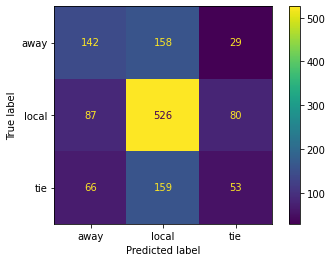

In [136]:
disp = ConfusionMatrixDisplay(cm, display_labels = clf.classes_)
disp.plot()

In [137]:
from sklearn.metrics import classification_report

In [138]:
print(classification_report(y_test, y_pred, target_names=clf.classes_))

              precision    recall  f1-score   support

        away       0.48      0.43      0.46       329
       local       0.62      0.76      0.68       693
         tie       0.33      0.19      0.24       278

    accuracy                           0.55      1300
   macro avg       0.48      0.46      0.46      1300
weighted avg       0.52      0.55      0.53      1300



In [140]:
import pickle

# Guardar modelo en fichero

with open('model_new.pkl', 'wb') as f:
    pickle.dump(clf, f)